**Project: Cyber Security Attack Type Detection**

**Preliminary EDA**

This notebook contains an initial exploratory data analysis (EDA) of the raw cybersecurity attack dataset (25 metrics, ~40,000 rows). 
The data has not yet been cleaned, so this analysis provides a high-level overview of attack patterns (e.g., attack types versus ports 
and severity) and highlights early feature and modeling considerations, while also highlighting data quality signals that may require 
attention from the DE team. Analysis will be refined once the cleaned dataset is provided by the DE team.

In [41]:
# 0. Import essential libraries
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns   


In [42]:
# 1. Load the CSV file
file_path = r"C:\Users\lina_\OneDrive - DSTI School of Engineering\PYTHON GROUP PROJECT\cybersecurity_attacks.csv"
df = pd.read_csv(file_path)


In [43]:
#  2.1 Dataset overview - the dataset looks as expected
df.head() 

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [44]:
#  2.2 Dataset overview 2 - 40000 rows and 25 columns as expected
df.shape

(40000, 25)

In [45]:
#  2.3 Dataset overview 3 - distinct values per column
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [46]:
# 3.1 Missing value analysis 1 - missing values per column
# Columns with missing values: Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts 

df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [47]:
# 3.2 Missing value analysis - the percentage of missing values per column
# The percentage of missing values for the indicated columns are significant at around 50 %
df.isnull().mean() * 100


Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

In [48]:
# 3.3 Missing value analysis - Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts
# Around 97% of rows with at least one missing value

cols = ["Malware Indicators", "Alerts/Warnings", "Proxy Information", "Firewall Logs", "IDS/IPS Alerts"]

# Count rows where any of these 5 columns is null
rows_with_missing = df[cols].isnull().any(axis=1).sum()
total_rows = len(df)

print(f"Rows with at least one missing value in the 5 columns: {rows_with_missing} out of {total_rows} ({rows_with_missing/total_rows*100:.2f}%)")

df[cols].isnull().sum()


Rows with at least one missing value in the 5 columns: 38763 out of 40000 (96.91%)


Malware Indicators    20000
Alerts/Warnings       20067
Proxy Information     19851
Firewall Logs         19961
IDS/IPS Alerts        20050
dtype: int64

In [49]:
# 3.4 Missing value analysis - 5 rows with missing values

# A small subset of rows (3.08%) contains attack labels while all five detection-related fields are missing, indicating attacks without recorded 
# detection evidence. These rows should be reviewed separately before deciding whether to retain, flag, or exclude them for modeling.

cols = [
    "Malware Indicators",
    "Alerts/Warnings",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts"
]

rows_all_null = df[cols].isnull().all(axis=1)

rows_all_null.sum(), len(df)


print(
    f"Rows where ALL 5 detection columns are NULL: "
    f"{rows_all_null.sum()} out of {len(df)} "
    f"({rows_all_null.mean()*100:.2f}%)"
)

df.loc[rows_all_null, cols + ["Attack Type"]].head()



Rows where ALL 5 detection columns are NULL: 1231 out of 40000 (3.08%)


,Malware Indicators,Alerts/Warnings,Proxy Information,Firewall Logs,IDS/IPS Alerts,Attack Type
5,NaN,NaN,NaN,NaN,NaN,Malware
11,NaN,NaN,NaN,NaN,NaN,Malware
45,NaN,NaN,NaN,NaN,NaN,DDoS
76,NaN,NaN,NaN,NaN,NaN,DDoS
109,NaN,NaN,NaN,NaN,NaN,DDoS


3.1 - 3.4 Missing value analysis 

Columns with missing values: Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts. These five security-related columns contain substantial missing data, with ~97% of rows missing at least one value. Handling these missing values will be critical for both feature engineering and modeling, and the DE team should consider whether these gaps reflect “no event,” partial logging, or conditional applicability.
These columns all represent outputs from security or monitoring systems and are only populated when a detection, alert, or log entry exists. Their high and similar missing rates likely indicate periods with no triggered events rather than data quality errors, to be investigated.

- As a working assumption, missing values in these security-related fields most likely indicate that no alert or log was generated, rather than data loss.
- They should not be treated the same as missing numeric fields
- For modeling, missingness itself could potentially be informative (e.g., alert present vs not)
- We must discuss how to handle the 5 rows with missing values

In [50]:
# 4.1 Duplicate records - there are e 0 duplicated rows in the dataset
df.duplicated().sum()

np.int64(0)

In [51]:
# 5.1 Basic statistics
# Shows valid port ranges, no signs of corruption or other warning signs
# There’s a mix of small and large packets.
# Varied spread of anomaly scores.
    
df.describe()


,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


5.1 Basic statistics

The results show that port values fall entirely within valid port ranges (approximately 1024–65535), with wide dispersion and no signs of corruption such as negative values, constant values, or truncated ranges. This confirms that the fields behave like standard network port numbers and are structurally sound for further aggregation or transformation.

Packet Length values range from small packets (64 bytes) to large packets (up to 1500 bytes), with a broad distribution across the quartiles. This spread is consistent with a mix of lightweight control traffic and larger data-carrying packets, suggesting that the dataset captures diverse network activity rather than a narrow or artificial traffic pattern.

Anomaly Scores span the full expected range from 0 to 100, with a median close to the midpoint and substantial variability. This indicates that the dataset contains both low-anomaly (normal) and high-anomaly (suspicious) observations, rather than being dominated by a single score range. The distribution suggests the scores are actively differentiating between levels of abnormality and are not degenerate or poorly scaled.


In [52]:
# 5.2 Basic statistics - count low, medium, high anomaly scores:
# Most of the data, around 75%, is medium or high anomaly, representing suspicious or attack-like traffic. Only 25% of the traffic is likely normal.

print((df['Anomaly Scores'] < 25).sum(), "low")
print(((df['Anomaly Scores'] >= 25) & (df['Anomaly Scores'] <= 75)).sum(), "medium")
print((df['Anomaly Scores'] > 75).sum(), "high")

9945 low
20044 medium
10011 high


In [53]:
# 5.3 Basic statistics - distribution and variety of categories
df.describe(include="object")

,Timestamp,Source IP Address,Destination IP Address,Protocol,Packet Type,Traffic Type,Payload Data,Malware Indicators,Alerts/Warnings,Attack Type,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000,40000,40000,40000,20000,19933,40000,...,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,3,2,3,40000,1,1,3,...,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,ICMP,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,Alert Triggered,DDoS,...,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,13429,20237,13376,1,20000,19933,13428,...,13529,13435,6,35,13408,16,2,20039,19950,20116


In [54]:
# 5.4 Basic statistics – Detection signals in security columns
cols = [
    "Malware Indicators",
    "Alerts/Warnings",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts"
]

# Rows with at least one detection signal
rows_with_signal = df[cols].notna().any(axis=1).sum()

# Rows with no detection signals at all
rows_without_signal = df[cols].isna().all(axis=1).sum()

rows_with_signal, rows_without_signal


(np.int64(38769), np.int64(1231))

5.4 Basic statistics – Detection signals in security columns

38769 rows have at least one detection signal, meaning at least one of the five security columns is filled. So these rows indicate that the system detected some activity: malware, alerts, proxy, firewall, or IDS/IPS.

1231 rows have no detection signals at all, meaning all five columns are null, so for these rows nothing was detected.

Since over 96% of the rows have at least one detection signal, it strongly suggests that the dataset is mostly attack-related, with very few rows potentially representing traffic without detected alerts. This needs to be further investigated.

In [55]:
# 5.4 Basic statistics - all traffic types 
df['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

5.1–5.4 Basic Statistics & Categorical Overview

Attack Type
* Dominant: DDoS (13,428 occurrences), indicating a repeated attack pattern
* Other attack types exist: Malware and Intrusion, less frequent but still relevant for analysis

Protocol
* ICMP dominates (13,429 records), reflecting network-level communication rather than application traffic
* High ICMP frequency suggests a large share of low-level or control traffic, which may include attack-like behavior
* TCP and UDP are also present, representing transport mechanisms rather than services

Protocol vs Traffic Type
* Protocol describes transport behavior (ICMP, TCP, UDP)
* Traffic Type describes service behavior (DNS, HTTP, FTP)
* Analyzing both together helps distinguish network-level activity from service-level patterns associated with attacks

Packet Type & Traffic Type
* Packet Type “Control” dominates (20,237), indicating heavy network control traffic rather than user-generated data
* DNS is the most frequent Traffic Type (13,376), suggesting possible DNS-focused attack patterns

Malware Indicators & Alerts/Warnings
* Missing values are significant, impacting feature engineering and interpretation
* When present, values such as “IoC Detected” or “Alert Triggered” align with attack activity

Source / Destination IP Addresses
* Most IP values are unique and behave as identifiers rather than reusable categories
* These may be more useful after aggregation (e.g., by subnet, region, or repeated sources)

Payload Data, User Information, Device Information, Geo-location Data
* Mostly unique or free-text fields, limiting direct statistical analysis
* Potentially valuable for deeper investigation such as tracing attack behavior or affected entities
* Missing values are notable in User and Device Information and may require special handling
* Geo-location data may be sparse but could support geographic attack pattern analysis

Severity Level
* Medium severity is most frequent, followed by High, aligning with anomaly score distribution
* Severity can be used to prioritize analysis, modeling focus, or downstream visualization by impact

Detection signal
* Over 96% of rows have at least one detection signal, confirming that the dataset predominantly represents attack-related traffic, with only a small fraction lacking recorded alerts.


In [56]:
# 6.1 High-level categorical exploration - Attack Type
df['Attack Type'].value_counts()


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [57]:
# 6.2 High-level categorical exploration - Protocol
# It confirms that the dataset has mostly ICMP traffic (network-level activity) and a similar amount of TCP/UDP traffic (service-related activity like DNS, HTTP, FTP).
df['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [58]:
# 6.3 High-level categorical exploration - Attack types
df['Attack Type'].head(10)


0      Malware
1      Malware
2         DDoS
3      Malware
4         DDoS
5      Malware
6         DDoS
7    Intrusion
8    Intrusion
9      Malware
Name: Attack Type, dtype: object

In [59]:
# 6.4 High-level categorical exploration - Missing attack types - none
df['Attack Type'].isnull().sum()

np.int64(0)

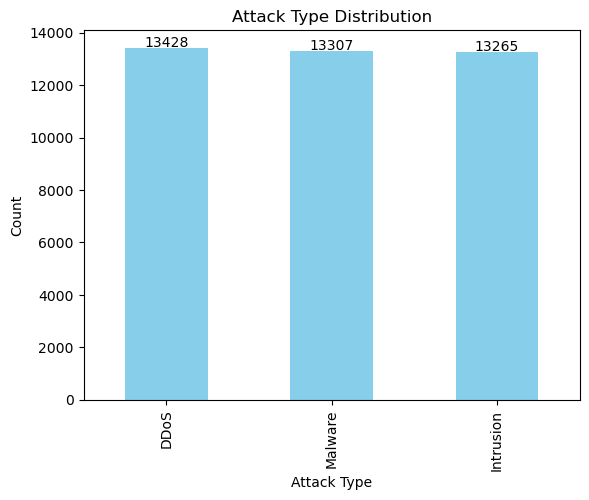

In [60]:
# 6.5 High-level categorical exploration - Attack type distribution

# Number of records per attack type
attack_counts = df['Attack Type'].value_counts()

ax = attack_counts.plot(kind='bar', color='skyblue')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')

# Label bars with count
for i, v in enumerate(attack_counts):
    ax.text(i, v + 50, str(v), ha='center')

plt.show()


In [61]:
# 6.7 High-level categorical exploration - Security alerts & indicators
# “IoC Detected” stands for Indicator of Compromise Detected

# Includes missing values in the count
df["IDS/IPS Alerts"].value_counts(dropna=False)
df["Malware Indicators"].value_counts(dropna=False)

# Cross with attack type
df.groupby("Attack Type")[["IDS/IPS Alerts", "Malware Indicators"]].value_counts(dropna=False)


Attack Type  IDS/IPS Alerts  Malware Indicators
DDoS         NaN             NaN                   3436
             Alert Data      IoC Detected          3359
                             NaN                   3338
             NaN             IoC Detected          3295
Intrusion    NaN             IoC Detected          3364
                             NaN                   3314
             Alert Data      IoC Detected          3301
                             NaN                   3286
Malware      Alert Data      IoC Detected          3380
             NaN             NaN                   3340
                             IoC Detected          3301
             Alert Data      NaN                   3286
Name: count, dtype: int64

6.7 High-level categorical exploration - Security alerts & indicators

IDS/IPS Alerts and Malware Indicators are sparse and often missing. “IoC Detected” is frequently observed, indicating confirmed attacks. Missing values may mean no alert triggered, system not enabled, or data loss. These fields may partly reveal attack outcomes, so they should be handled carefully during feature engineering and flagged as potential data leakage risks.

Feature engineering can handle these by creating:
-  Binary flags (alert vs no alert)
-  Separate features per attack type
-  Missing value treatment

6.1 - 6.7 High-level categorical exploration - Attack type analysis

The dataset contains three identified attack types: DDoS, Malware, and Intrusion.
Each attack type appears with a similar number of records (approximately one third of the dataset each).
At this point, no additional attack types are visible in the raw data. If other attack categories exist, they may only emerge after data cleaning, re-labeling, or feature engineering, which will be handled in later stages by the DE and DS.

Based on the observed counts, there is no strong class imbalance among the identified attack types at this stage, as no single class dominates the dataset.
- DDoS ≈ 13.4k
- Malware ≈ 13.3k
- Intrusion ≈ 13.3k


Potential modeling considerations (early signals)

- Attack type distribution: Since the three attack types are similarly represented, basic classification models are unlikely to be biased toward a single class at this stage.

- Source and Destination IP addresses: Most IP values appear only once, meaning they behave as identifiers rather than reusable categories. These will likely require transformation or aggregation before being useful for modeling.

- Missing information: Malware Indicators, Alerts/Warnings, and User and Device Information contain missing values. These columns will require review and handling before they can be reliably used. 

- Free-text fields: Columns such as Payload Data, User Information, and Device Information are not directly usable for statistical modeling in their current form. However, they may be valuable later for deeper investigation, such as identifying recurring patterns or tracing specific attack behaviors.

- Security alerts and indicators can be transformed into binary flags, separated by attack type, and missing values handled to create usable modeling features.

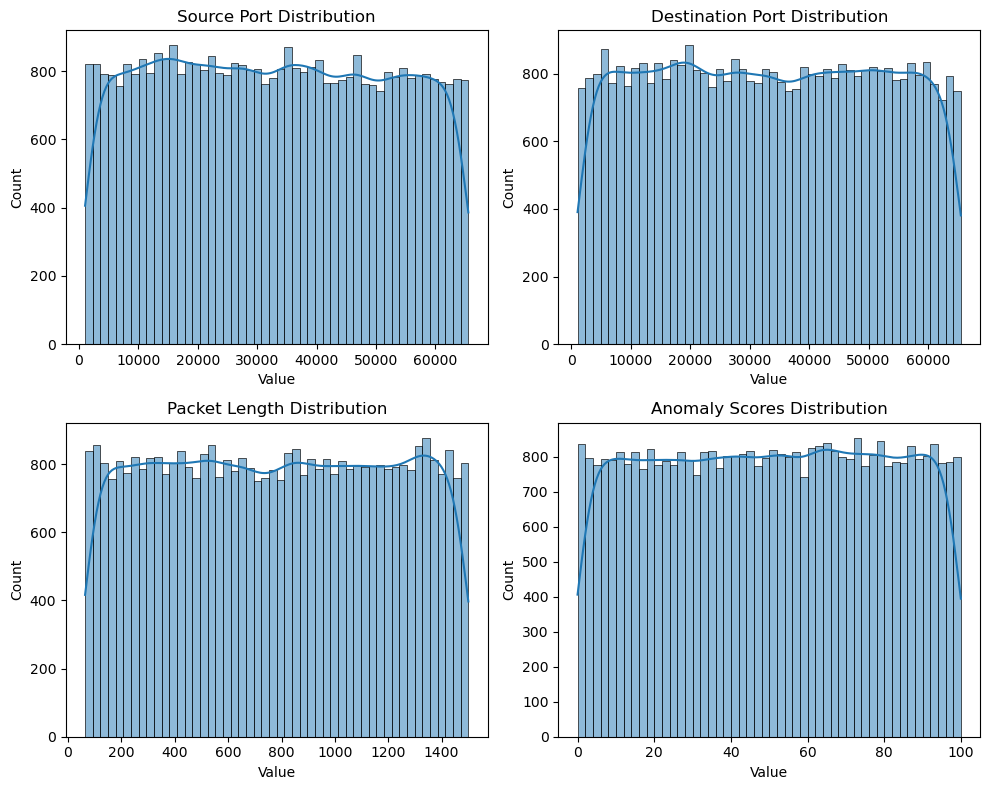

In [62]:
# 7.1 High-level numerical exploration

numeric_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()

7.1 High-level numerical exploration

Overall, no extreme skew or obvious outliers, just a few small peaks and drops within each graph. These patterns may be explored further during the detailed investigation.



In [63]:
# 8.1 Numerical feature skewness (asymmetry of the distribution)
df.skew(numeric_only=True)


Source Port         0.024472
Destination Port    0.008106
Packet Length      -0.000482
Anomaly Scores     -0.011169
dtype: float64

In [77]:
# 8.2 Numerical feature distribution summary
df.describe(percentiles=[0.01, 0.99])

,Timestamp,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2021-11-22 06:17:52.200800256,32970.356450,33150.868650,781.452725,50.113473
min,2020-01-01 00:43:27,1027.000000,1024.000000,64.000000,0.000000
1%,2020-01-16 05:31:28.270000128,1623.990000,1728.970000,77.000000,0.960000
50%,2021-11-21 18:12:51,32856.000000,33004.500000,782.000000,50.345000
99%,2023-09-27 03:25:15.280000,64889.020000,64853.000000,1486.000000,99.000100
max,2023-10-11 19:34:23,65530.000000,65535.000000,1500.000000,100.000000
std,NaN,18560.425604,18574.668842,416.044192,28.853598


In [82]:
# 8.3 Numeric features vs Attack Type (distribution-based)
# Packet Length and Anomaly Scores show nearly identical distributions across attack types, suggesting they capture traffic intensity or severity rather than providing strong standalone separation between attack categories.


df.groupby("Attack Type")[numeric_cols].describe()


Packet Length                                                      \
                    count        mean         std   min    25%    50%     75%   
Attack Type                                                                     
DDoS              13428.0  785.348749  416.685412  64.0  424.0  786.0  1150.0   
Intrusion         13265.0  780.924387  418.209936  64.0  412.0  785.0  1145.0   
Malware           13307.0  778.047945  413.221127  64.0  426.0  777.0  1135.0   

                    Anomaly Scores                                             \
                max          count       mean        std   min     25%    50%   
Attack Type                                                                     
DDoS         1500.0        13428.0  50.235063  28.857465  0.00  25.470  50.42   
Intrusion    1500.0        13265.0  49.978029  28.815402  0.00  24.840  50.18   
Malware      1500.0        13307.0  50.125794  28.889315  0.01  25.055  50.42   

                            
               75%     max  
Attack Type                 
DDoS         75.07   99.99  
Intrusion    74.69  100.00  
Malware      75.28   99.99

8.3 Numeric features vs Attack Type (distribution-based)
While these numeric features provide valuable context regarding traffic volume and intensity, their nearly identical distributions across all classes mean they lack standalone predictive power. Documenting this 'class-agnostic' behavior is critical, as it confirms that the model must rely on complex feature interactions or categorical data to successfully differentiate between attack types

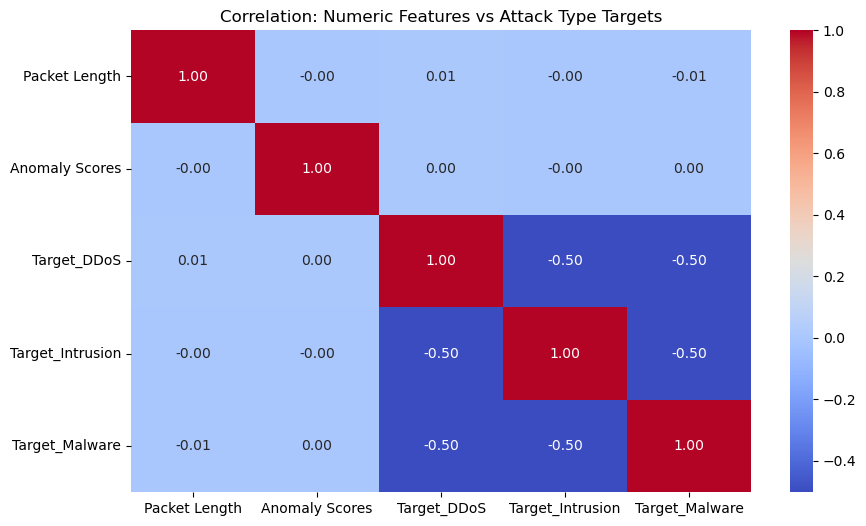

In [89]:
# 8.4 Numerical feature - Correlation Heatmap: Numeric Features vs Attack Type
# The heatmap reveals a near-zero correlation (±0.01) between the numeric features and attack types, proving that variables like Packet Length and Anomaly Scores cannot independently identify specific threats.

# Dummy variables for Attack Type to calculate correlation
corr_df = df[numeric_cols].copy()
attack_dummies = pd.get_dummies(df['Attack Type'], prefix='Target')
corr_df = pd.concat([corr_df, attack_dummies], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Numeric Features vs Attack Type Targets")
plt.show()

8.4 Numerical feature - Correlation Heatmap: Numeric Features vs Attack Type

* Linear Models will fail: Because the correlation between Packet Length/Anomaly Scores and the Targets is 0.00, a simple Linear Regression will not work. We need a model that doesn't rely on linear relationships (like a Random Forest).

* Feature Importance is elsewhere: This visual proves that the "answer" is not in the numeric columns. The model must prioritize the Port Categories and Security Signals to be accurate.

* The Dataset is Balanced: The consistent -0.50 suggests that the attack types are likely evenly distributed (about 1/3 each), which is good for training as the model won't be biased toward one specific type.

8.1-8.3  Numerical feature analysis 

The numeric feature distributions shown in the histograms are consistent with the descriptive statistics.
Source and Destination Ports span the expected numeric ranges with wide variability, while Packet Length shows a spread from small to large packets.
Anomaly Scores are centered around 50 with values covering the full 0–100 range, indicating variation in assessed severity rather than a single uniform level.

At this stage, Anomaly Scores suggest relative differences in traffic severity within the dataset. However, they do not confirm the presence of truly “normal” traffic, as the dataset may primarily represent attack or attack-like events with varying intensity.

In [66]:
# 9.1 Cross-feature check - Severity Levels vs Attack Type

# The distribution of Severity Level across attack types is fairly even. Each attack type has roughly the same number of High, Medium, and Low severity records. Nothing stands out at this stage—this can be explored in more detail after data cleaning and deeper analysis.

pd.crosstab(df['Attack Type'], df['Severity Level'])

Severity Level,High,Low,Medium
Attack Type,,,
DDoS,4523,4450,4455
Intrusion,4427,4374,4464
Malware,4432,4359,4516


In [67]:
# 9.2 Cross-feature check - Protocol vs Source Port

# Sample of 20 Source Ports

pd.crosstab(df['Protocol'], df['Source Port'].head(20)) 

Source Port,4510,6131,10903,16513,16811,17245,17430,20018,24912,26562,31225,34489,35538,37918,39934,43729,47795,53471,55147,56296
Protocol,,,,,,,,,,,,,,,,,,,,
ICMP,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0
TCP,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1
UDP,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


In [68]:
# 9.3 Cross-feature check - Protocol vs Destination Port

# Sample of 20 Destination Ports

pd.crosstab(df['Protocol'], df['Destination Port'].head(20))

Destination Port,5259,10845,17416,17595,17616,20396,20857,21176,26646,26783,32534,35006,35243,36817,38048,48166,50039,50583,52805,53600
Protocol,,,,,,,,,,,,,,,,,,,,
ICMP,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
TCP,1,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
UDP,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1


In [88]:
# 9.4 Cross-feature check - Port range vs Attack Type

pd.crosstab(df["Destination Port Range"], df["Attack Type"])

Attack Type,DDoS,Intrusion,Malware
Destination Port Range,,,
Ephemeral,3396,3399,3279
Registered,10032,9866,10028


9.4 Cross-feature check - Port range vs Attack Type
The grouping shows that Malware targets Registered ports at a much higher rate than Ephemeral ones, unlike DDoS and Intrusion which are more evenly spread. A 'Port Category' feature for the model could be beneifital, as this provides the first clear categorical fingerprint to help distinguish Malware from other attack types.

* DDoS and Intrusion: Are more balanced but show a slight preference for Ephemeral ports. These are often used for temporary, high-speed connections or "custom" backdoors.

* Malware: Shows a much stronger concentration in the Registered ports (nearly 3 to 1 ratio compared to Ephemeral). Many malware strains target specific registered services or use those ports for "Command and Control" communication.

In [69]:
# 9.5 Cross-feature check - group ports into ranges (well-known / registered / ephemeral)

def port_range(port):
    if port <= 1023:
        return "Well-known"
    elif port <= 49151:
        return "Registered"
    else:
        return "Ephemeral"

df["Source Port Range"] = df["Source Port"].apply(port_range)
df["Destination Port Range"] = df["Destination Port"].apply(port_range)

df[["Source Port", "Source Port Range", "Destination Port", "Destination Port Range"]].head()

,Source Port,Source Port Range,Destination Port,Destination Port Range
0,31225,Registered,17616,Registered
1,17245,Registered,48166,Registered
2,16811,Registered,53600,Ephemeral
3,20018,Registered,32534,Registered
4,6131,Registered,26646,Registered


9.5 Cross-feature sanity check - group ports into ranges (well-known / registered / ephemeral)

Most ports fall in Registered, some in Ephemeral, and few in Well-known. This confirms that attacks target mostly mid/high-number ports rather than system ports. Grouping ports into ranges turns raw numbers into behavioral categories, which can be used for modeling or cross-feature analysis. Combining these ranges with Attack Type helps reveal patterns, e.g., DDoS mainly targets Registered or Ephemeral ports. This also helps detect unusual or stealthy port use if a Well-known port suddenly appears for an unexpected attack.

Modeling recommendation: use port ranges as categorical features, consider cross-features with Attack Type.
Data engineering recommendation: verify port values are valid, no missing or corrupted entries, and maintain consistent categorization for feature generation.

In [83]:
# 9.6 Cross-feature check - Numeric vs categorical association (Attack Type)
# The nearly identical medians confirm that the 'typical' behavior of each attack is indistinguishable through numeric features alone, reinforcing the need for a model that can identify more subtle categorical relationships.

df.groupby("Attack Type")[numeric_cols].median()


,Packet Length,Anomaly Scores
Attack Type,,
DDoS,786.0,50.42
Intrusion,785.0,50.18
Malware,777.0,50.42


# 9.7 Cross-feature check - Port behavior by Attack Type
# There are no obvious ports with strong attack-specific patterns

df.groupby("Attack Type")["Destination Port"].value_counts().groupby(level=0).head(5)

9.6 Cross-feature check - Port behavior by Attack Type
The most frequent destination ports for each attack type appear only a few times, indicating that raw port numbers do not strongly characterize attack types and should be treated as identifiers rather than standalone predictive features.

In [90]:
# 9.8  Cross-feature check - Source Port Category vs Attack Type

# Categorizing Source Ports (0-1023: Well-known, 1024-49151: Registered, 49152+: Ephemeral)
def categorize_port(port):
    if port <= 1023: return 'Well-known'
    elif port <= 49151: return 'Registered'
    else: return 'Ephemeral'

df['Source Port Category'] = df['Source Port'].apply(categorize_port)
source_port_dist = pd.crosstab(df['Attack Type'], df['Source Port Category'])
print(source_port_dist)

Source Port Category  Ephemeral  Registered
Attack Type                                
DDoS                       3342       10086
Intrusion                  3302        9963
Malware                    3235       10072


9.8  Cross-feature check - Source Port Category vs Attack Type

Analysis of port ranges confirms that while virtually all traffic originates from and targets the Registered/Ephemeral ranges, a critical behavioral split exists: Destination Port distributions show strategic targeting (Malware favors Registered ports), whereas Source Port distributions are mathematically identical across all attack types.

Prioritize 'Destination Port Range' as a key categorical feature. 'Source Port' features should be de-prioritized, as their uniform distribution across classes confirms they act as randomized 'noise' that offers no help in distinguishing between attack types.

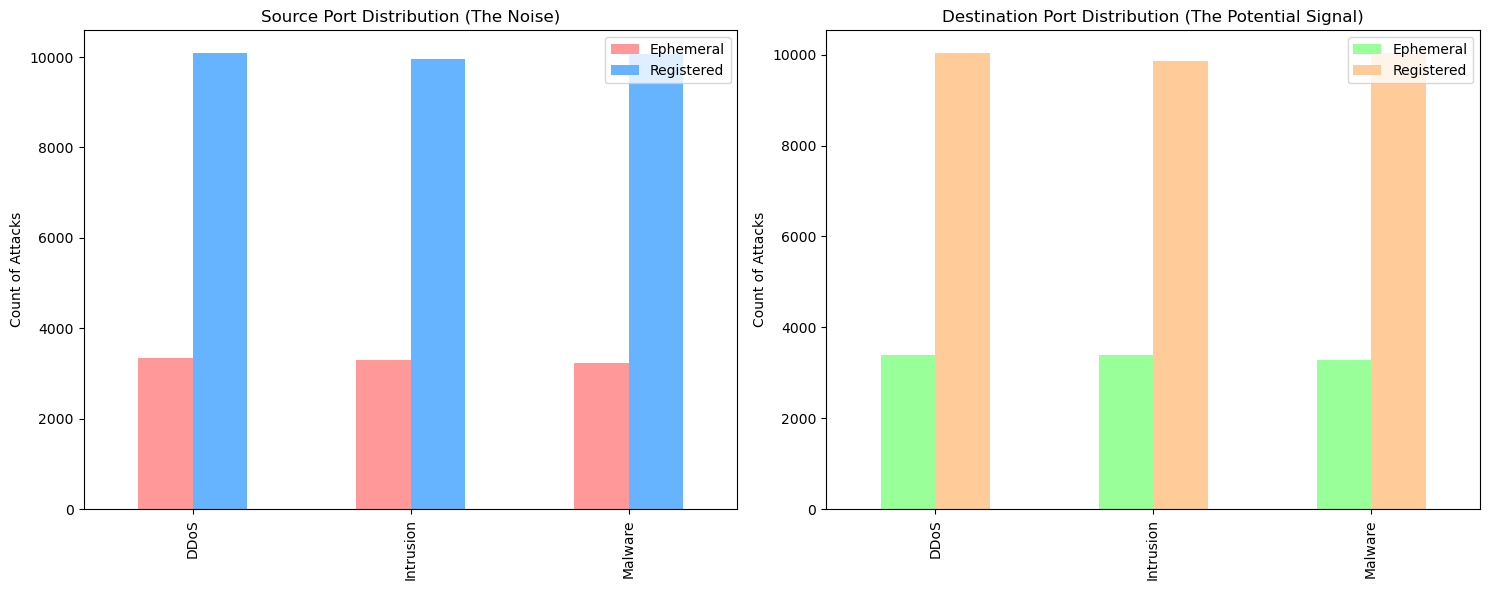

In [92]:
# 9.9  Cross-feature check - Noise & Potential Signal

# Data from Source Port Category vs Attack Type
source_data = {
    'Ephemeral': [3342, 3302, 3235],
    'Registered': [10086, 9963, 10072]
}
dest_data = {
    'Ephemeral': [3396, 3399, 3279],
    'Registered': [10032, 9866, 10028]
}
index = ['DDoS', 'Intrusion', 'Malware']

df_source = pd.DataFrame(source_data, index=index)
df_dest = pd.DataFrame(dest_data, index=index)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Source Ports
df_source.plot(kind='bar', stacked=False, ax=ax1, color=['#ff9999','#66b3ff'])
ax1.set_title("Source Port Distribution (The Noise)")
ax1.set_ylabel("Count of Attacks")

# Plot Destination Ports
df_dest.plot(kind='bar', stacked=False, ax=ax2, color=['#99ff99','#ffcc99'])
ax2.set_title("Destination Port Distribution (The Potential Signal)")
ax2.set_ylabel("Count of Attacks")

plt.tight_layout()
plt.savefig('port_comparison.png')

9.9  Cross-feature check - Nois & Potential Signal
The graphs tells that broad categories like 'Port Range' and 'Packet Length' are nearly uniform across all attack types. This suggests that the 'signal' is likely hidden in specific Port Numbers (e.g., Port 80 vs Port 443) or Protocol types, rather than broad ranges like Registered or Ephemeral.

9.2 - 9.4 Protocol vs Source/Destination Port analysis

The cross-tab of Protocol with Source and Destination Ports can guide feature engineering by highlighting commonly used ports and potential unusual activity. Possible DS team actions include:
- Identify the most frequently used ports per protocol.
- Flag unusual or rare port usage that could indicate suspicious activity.
- Aggregate ports into categories (e.g., well-known vs high-number ports) for modeling.
- Encode protocol-port combinations numerically for machine learning features.
- Create derived features like “number of unique ports per IP” or “port usage patterns over time.”
- Use port ranges as categorical features, consider cross-features with Attack Type.

In [70]:
# 10.1 Convert Timestamp to datetime from string, timestamp overview
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Timestamp'].describe()


count                            40000
mean     2021-11-22 06:17:52.200800256
min                2020-01-01 00:43:27
25%         2020-12-12 19:56:28.500000
50%                2021-11-21 18:12:51
75%         2022-10-30 08:48:10.500000
max                2023-10-11 19:34:23
Name: Timestamp, dtype: object

10.1 Timestamp analasyis 

- Count: 40,000 rows have a timestamp, so no missing timestamps.
- Min / Max: The dataset spans from Jan 1, 2020 to Oct 11, 2023, roughly 4 years of data.
- Quartiles (25%, 50%, 75%): Half of the data is between Dec 2020 and Oct 2022, showing when most records occurred.
- Mean: The average timestamp is Nov 2021, roughly in the middle of the dataset.

More detailed analasyis could be made for: 
- For timestamp trend analysis (e.g., identifying months with unusually high attack activity)
- Detection of bursts or gaps (e.g., periods of zero traffic that might indicate logging issues), 
- Generation of time-based features for modeling (e.g., hour-of-day, day-of-week, month, or seasonal attack patterns). 
- DE may use this for feature engineering and attack pattern analysis (e.g., predicting likely attack periods or detecting abnormal bursts).

In [71]:
# 11.1 Volume, Frequency & Behavioral Patterns - Source IP Address
df['Source IP Address'].value_counts().head()

Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
Name: count, dtype: int64

In [72]:
# 11.2 Volume, Frequency & Behavioral Patterns - Source Ports
df['Source Port'].value_counts().head()

Source Port
41341    6
31656    5
8653     5
24528    5
60026    5
Name: count, dtype: int64

In [73]:
# 11.3 Volume, Frequency & Behavioral Patterns - Destination Ports
df['Destination Port'].value_counts().head()

Destination Port
34117    6
7508     6
30804    5
37248    5
57508    5
Name: count, dtype: int64

In [85]:
# 11.4 Volume, Frequency & Behavioral Patterns - Numeric features vs Detection signals (Behavioral Interaction)
# Attacks can 'hide' within standard traffic ranges

security_cols = [
    "Malware Indicators",
    "Alerts/Warnings",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts"
]
df["Has Detection Signal"] = df[security_cols].notna().any(axis=1)
df.groupby("Has Detection Signal")[numeric_cols].mean()


,Packet Length,Anomaly Scores
Has Detection Signal,,
False,807.021121,49.919115
True,780.640873,50.119645


11.4 Volume, Frequency & Behavioral Patterns - Numeric features vs Detection signals (Behavioral Interaction)

Since numeric values do not spike even when a security alert is triggered, we must assume attacks can 'hide' within standard traffic ranges. The model could be configured to treat security alerts as independent primary features rather than expecting them to correlate with traffic volume or anomaly spikes.

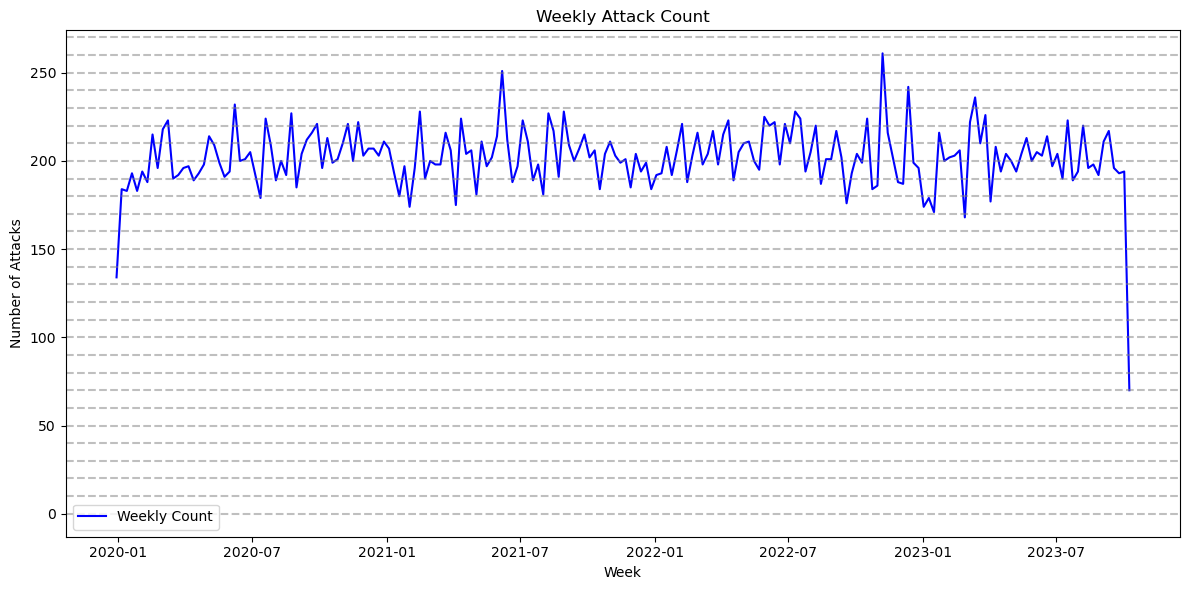

In [74]:
# 11.5 Volume & frequency patterns - Weekly attacks
# Time-based features reveal attack patterns, support predictive modeling, and guide operational decisions by highlighting periods of recurring or unusual activity.

# Ensure timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Weekly aggregation
attacks_per_week = df.groupby(df['Timestamp'].dt.to_period('W')).size()
attacks_per_week.index = attacks_per_week.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(attacks_per_week.index, attacks_per_week.values, color='blue', label='Weekly Count')

# Horizontal reference lines
for y in range(0, int(attacks_per_week.max()) + 10, 10):
    plt.axhline(y=y, color='gray', linestyle='--', alpha=0.5)

plt.title('Weekly Attack Count')
plt.xlabel('Week')
plt.ylabel('Number of Attacks')
plt.legend()
plt.tight_layout()
plt.show()

11.4 Volume & frequency patterns - Weekly attacks

Timestamps can be transformed into features such as week of year, month, day of week, or season to uncover temporal patterns in attacks. These features can reveal when attacks cluster, which periods tend to be targeted more heavily, and how attack types vary over time. For modeling, they provide structured signals that improve predictive performance, while strategically, they inform planning for monitoring, detection, and mitigation efforts. Combining time features with attack type or network attributes can highlight recurring patterns or unusual activity that might otherwise be missed.

11.1-11.5 Volume & frequency patterns 

As stated before, most Source IPs appear only once, indicating high diversity and few repeated sources. A few Source/Destination Ports are used slightly more, highlighting potential points of focus for attack patterns. This helps identify “heavy hitters” versus one-off events for feature engineering or deeper investigation. Time-based features could provide structured signals that help the model detect temporal attack patterns and improve prediction accuracy.

In [75]:
# 12.1 Feature stability & noise scan (standard deviation)

df.std(numeric_only=True)


Source Port         18560.425604
Destination Port    18574.668842
Packet Length         416.044192
Anomaly Scores         28.853598
dtype: float64

12.1 Feature stability & noise scan (standard deviation)

Feature variability shows that Source and Destination Ports cover a wide range of values, while Packet Length and Anomaly Scores are more tightly clustered around their means. This indicates that port features are highly variable and may need careful handling for modeling, whereas Packet Length and Anomaly Scores are relatively stable.

- Analysis to consider the distribution of attacks across ports, not just the most common ones.
- Rarely used ports could indicate stealthy or unusual attack patterns.
- For modeling, port variability may require feature engineering (e.g., grouping ports by service type or port ranges) to make patterns more meaningful.

13.1 Preliminary feature hypotheses highlights (details in the different analysis sections)

- Attack Type: DDoS, Malware, Intrusion – nearly equal, rare types could appear after cleaning or re-labeling.
- Protocol: ICMP, TCP, UDP, network vs service-level activity. Watch rare combinations.
- Packet / Traffic Type: Control packets and DNS dominate. Check for unknown labels and rare types.
- Malware Indicators / Alerts: IoC Detected / Alert Triggered signal attacks. Missing values need handling.
- Source / Destination IP: Mostly unique. Useful for clustering, mapping, or subnet/geography analysis.
- Source / Destination Ports: Some ports are used a lot, which could show common attack points, while rarely used ports might point to unusual or
  hidden activity.
- Payload / User / Device / Geo: Free-text, limited direct use but could reveal patterns in final detailed investigation. Missing values require review.
- Severity / Anomaly Score: Medium/high dominate, reflects suspicious traffic. Slight variations may guide prioritization.
- Timestamp: Covers around 4 years, supports trend/burst detection and time-based features.
- Packet Length: Packet lengths vary from small to large, which could help tell normal traffic apart from potential attacks.


14.1 Bias & coverage checks highlights (details in the different analysis sections)

Main attack types (DDoS, Malware, Intrusion) are roughly equal, rare types may appear after cleaning.
Missing values in User/Device Info and Malware Indicators could affect analysis.
Common protocols, packet types, and ports dominate, but rare values might signal unusual activity.
Most IPs are unique, showing high diversity, packet lengths and anomaly scores are fairly balanced.
Timestamps span around 4 years, making it suitable for trend analysis and time-based feature creation.

Takeaway: The dataset is generally balanced, but rare patterns, missing data, and unusual activity may require attention during modeling or deeper investigation.

15.1  Data leakage risk scan

Some columns in the dataset could reveal the attack type either directly or indirectly. If a model can use these features to “see” the answer, it may appear accurate during training but fail on new data. These potentially risky columns should be handled carefully during feature engineering to prevent data leakage, ensuring that models do not get indirect access to the target:

- IoC Detected: only has values when an attack occurs, directly signaling the target.
- Alert Triggered: similar to IoC, appears only during attacks.
- Any feature coming from the same system that defines the attack type might accidentally reveal the answer instead of helping the model learn.

17.1 Assumptions & uncertainties

- Missing values in security event columns indicate the absence of recorded information. Whether this represents “no event detected” or
  uncollected data cannot be confirmed without system documentation.
- User Information, Device Information: missing values, unclear if representative
- Payload Data: free-text, meaning and format not fully understood
- Geo-location: sparse, accuracy uncertain
- Severity Level: interpretation assumed as an impact indicator
- Anomaly Score: assumed higher values indicate suspicious activity
- IoC Detected / Alert Triggered: assumed to signal attacks
- Source / Destination IP: uniqueness treated as identifiers, may hide repeated actors
- Source / Destination Ports: wide range, unclear if certain ranges are meaningful
- Attack Type: only three identified, possible minor attack types may also exist
- Protocol / Traffic Type: some rare combinations may exist, purpose assumed from documentation
- Packet Type / Packet Length: assumed that larger packets may relate to attack traffic

18.1 Findings and recommendations (not conclusions)

- Attack types are roughly balanced: DDoS, Malware, Intrusion appear with similar counts. The current balance allows basic classification
  without strong class weighting, but be aware that additional attack types may emerge after cleaning or feature engineering, which could
  require adjusting the model or class weights.
- Over 96% of rows have at least one detection signal, confirming that the dataset predominantly represents attack-related traffic, with only a small
  fraction lacking recorded alerts.
- Source and Destination IPs are mostly unique, so they don’t provide reusable categories on their own, but they could be valuable for
  analysis if aggregated, e.g., clustering by subnet, geographic region, or repeated sources—to reveal patterns or hotspots in attacks.
- Protocol and Traffic Type patterns suggest network vs service-level activity. It could be insightful to create combined features (e.g.,
  protocol × traffic type) to capture transport vs service behavior for modeling.
- Packet Length and Anomaly Scores show a mix of normal and suspicious traffic. For modeling, consider grouping packet lengths and anomaly
  scores into ranges or rescaling them, to help the model distinguish normal from attack traffic.
- Timestamps cover around 4 years, enabling trend and time-based feature analysis. Extract time-based features such as hour, day, month, or
  season from timestamps to help the model capture temporal attack patterns.
- User Information, Device Information and Geo-location Data contain high-cardinality or free-text data, which limits direct statistical
  analysis, but can be useful when conducting a more in-depth investigation.
- Use port ranges as categorical features, consider cross-features with Attack Type.
- Time-based features could provide structured signals that help the model detect temporal attack patterns and improve prediction accuracy.
- As a working assumption, missing values in these security-related fields most likely indicate that no alert or log was generated, rather than data
  loss.
- The 5 rows with missing values require investigation and might have to be deleted. They may reflect no event triggered, unavailable or disabled
  logging, data loss, partial ingestion, or fields that only apply to certain attack types.
    - Malware Indicators
    - Alerts/Warnings
    - Proxy Information
    - Firewall Logs
    - IDS/IPS Alerts